In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [151]:
data = pd.read_csv('C:/Users/Dell/Downloads/titan_train.csv')
data_test = pd.read_csv('C:/Users/Dell/Downloads/titan_test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
data['PassengerId'].nunique()

891

In [63]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [64]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [65]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'])
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_female   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
 12  Embarked_C   891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(5)
memory usage: 74.1+ KB


In [67]:
# Dropping the 'Cabin' column since it has 
data = data.drop(['Cabin','Ticket'], axis = 1)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


In [71]:
# dealing with missing data
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [72]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [73]:
data['Title'] = data['Name'].str.split(' ',expand = True).iloc[:,1]

In [74]:
data = data.drop('Name', axis = 1)

In [75]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,Mr.
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,Mrs.
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,Miss.
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,Mrs.
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,Mr.


In [76]:
data['Title'].nunique()

31

In [77]:
data['Title'].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Mlle.             2
Major.            2
Gordon,           2
Col.              2
Steen,            1
Melkebeke,        1
Don.              1
Mulder,           1
Walle,            1
Cruyssen,         1
Carlo,            1
Pelsmaeker,       1
Shawah,           1
Jonkheer.         1
Capt.             1
Ms.               1
Velde,            1
Mme.              1
Billiard,         1
the               1
der               1
Messemaeker,      1
Name: Title, dtype: int64

<AxesSubplot:>

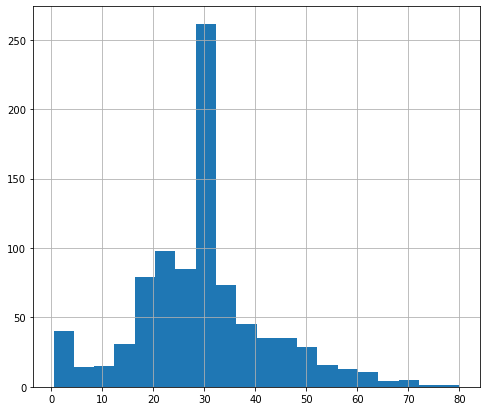

In [80]:
# Basic eda

data['Age'].hist(bins = 20, figsize = (8,7))

<AxesSubplot:xlabel='Pclass', ylabel='count'>

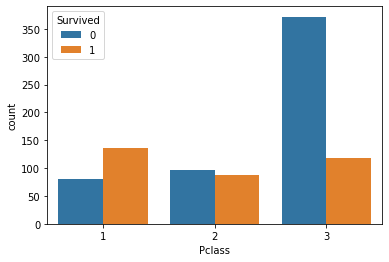

In [89]:
sns.countplot(data = data, x = 'Pclass', hue = 'Survived')

In [108]:
data = data.drop('PassengerId', axis = 1)

In [109]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.032024,-0.013855,-0.027121
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


In [110]:
# Splitting data

x = data.drop(['Survived','Title'], axis = 1)
y = data['Survived']

In [111]:
# Scaling data
x_scaled = StandardScaler().fit_transform(x)

In [112]:
# Splitting data into training and testing
x_tr, x_test, y_tr, y_test = train_test_split(x_scaled, y, test_size = 0.2, stratify = y)

In [113]:
# Logistic regression
lr = LogisticRegression().fit(x_tr, y_tr)
pred_lr = lr.predict(x_test)

In [114]:
print(confusion_matrix(y_test,pred_lr))

[[97 13]
 [24 45]]


In [115]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [154]:
# Test data

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [155]:
dt_test = data_test.drop(columns = ['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [156]:
# Filling the missing values

dt_test['Age'] = dt_test['Age'].fillna(dt_test['Age']).mean()
dt_test['Fare'] = dt_test['Fare'].fillna(dt_test['Fare']).mean()
dt_test = pd.get_dummies(dt_test, ['Sex','Embarked'])

In [157]:
#Scaling 
x = StandardScaler().fit_transform(dt_test)

In [158]:
pred = lr.predict(x)

In [159]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [167]:
df = pd.DataFrame(data_test['PassengerId'])
df['Prediction'] = pred

In [170]:
df.head()

,PassengerId,Prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [171]:
df.to_csv('Titanic_pred.csv')

In [135]:
# Using svm

svm = SVC(kernel = 'linear').fit(x_tr, y_tr)

In [136]:
pred_svm = svm.predict(x_test)

In [137]:
print(confusion_matrix(y_test,pred_svm))

[[96 14]
 [26 43]]


In [138]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.75      0.62      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179

